# **Proyecto:** Crear un modelo de regresión Lineal para predecir el valor de casas

## Para desarrollar este proyecto se utilizará Python y la biblioteca Scikit-learn para construir y entrenar nuestro modelo de regresión lineal.

### Desarrollo

A continuación se importan las librerías necesarias para  desarrollar el desafío:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

### Carga de Dataset

In [ ]:
url = "https://raw.githubusercontent.com/fzunigaGH/Proyectos_ciencia_Datos/main/Machine_Learning/Aprendizaje_no_supervisado/data/data-housing.csv"
df = pd.read_csv(url)

### Funciones

In [ ]:
def remove_outliers(df, column):# función remove_outliers. Recibe como parámetros: el DataFrame y la columna del dataframe que se requiere analizar
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_desafio = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return  df_desafio

def identifica_outliers(df, column):# función identifica_outliers. Recibe como parámetros: el DataFrame y la columna del dataframe que se requiere analizar
    sns.boxplot(df[column])
    plt.show()
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_SO = df[(df[column]< lower_bound) | (df[column] > upper_bound)]
    #print(f"\n\nA continuación se presentan los registros outliers\n")
    #sns.histplot(df_SO[column], bins= 20
    return df_SO

def df_sin_outliers(df, column): # función que retorna un DataFrame sin elementos outliers. Recibe como parámetros: el DataFrame y la columna del dataframe que se requiere analizar
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_desafio = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_desafio


def remove_outliers_upper(df, column):# función remove_outliers. Recibe como parámetros: el DataFrame y la columna del dataframe que se requiere analizar
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_desafio = df[df[column] <= upper_bound]
    return df_desafio


def remove_outliers_lower(df, column):# función remove_outliers. Recibe como parámetros: el DataFrame y la columna del dataframe que se requiere analizar
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_desafio = df[df[column] >= lower_bound]
    return df_desafio

### Análisis Exporatorio de Datos (EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   price            545 non-null    int64 
 1   area             545 non-null    int64 
 2   bedrooms         545 non-null    int64 
 3   bathrooms        545 non-null    int64 
 4   stories          545 non-null    int64 
 5   guestroom        545 non-null    object
 6   hotwaterheating  545 non-null    object
 7   airconditioning  545 non-null    object
 8   parking          545 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 38.4+ KB


Al realizar una primera inspección al dataset utlizando el método .info() se logra apreciar la ausencia de datos nulos o faltantes.

Con el método .describe() se realiza un primer análisis descriptivo.

In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Luego se explora la cabecera del dataset para identificar los datos contenidos.

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,guestroom,hotwaterheating,airconditioning,parking
0,13300000,7420,4,2,3,no,no,yes,2
1,12250000,8960,4,4,4,no,no,yes,3
2,12250000,9960,3,2,2,no,no,no,2
3,12215000,7500,4,2,2,no,no,yes,3
4,11410000,7420,4,1,2,yes,no,yes,2


###Análisis de relación entre variables

A continuación se identidicarán las variables que están relacionadas, mediente el uso de un pairplot

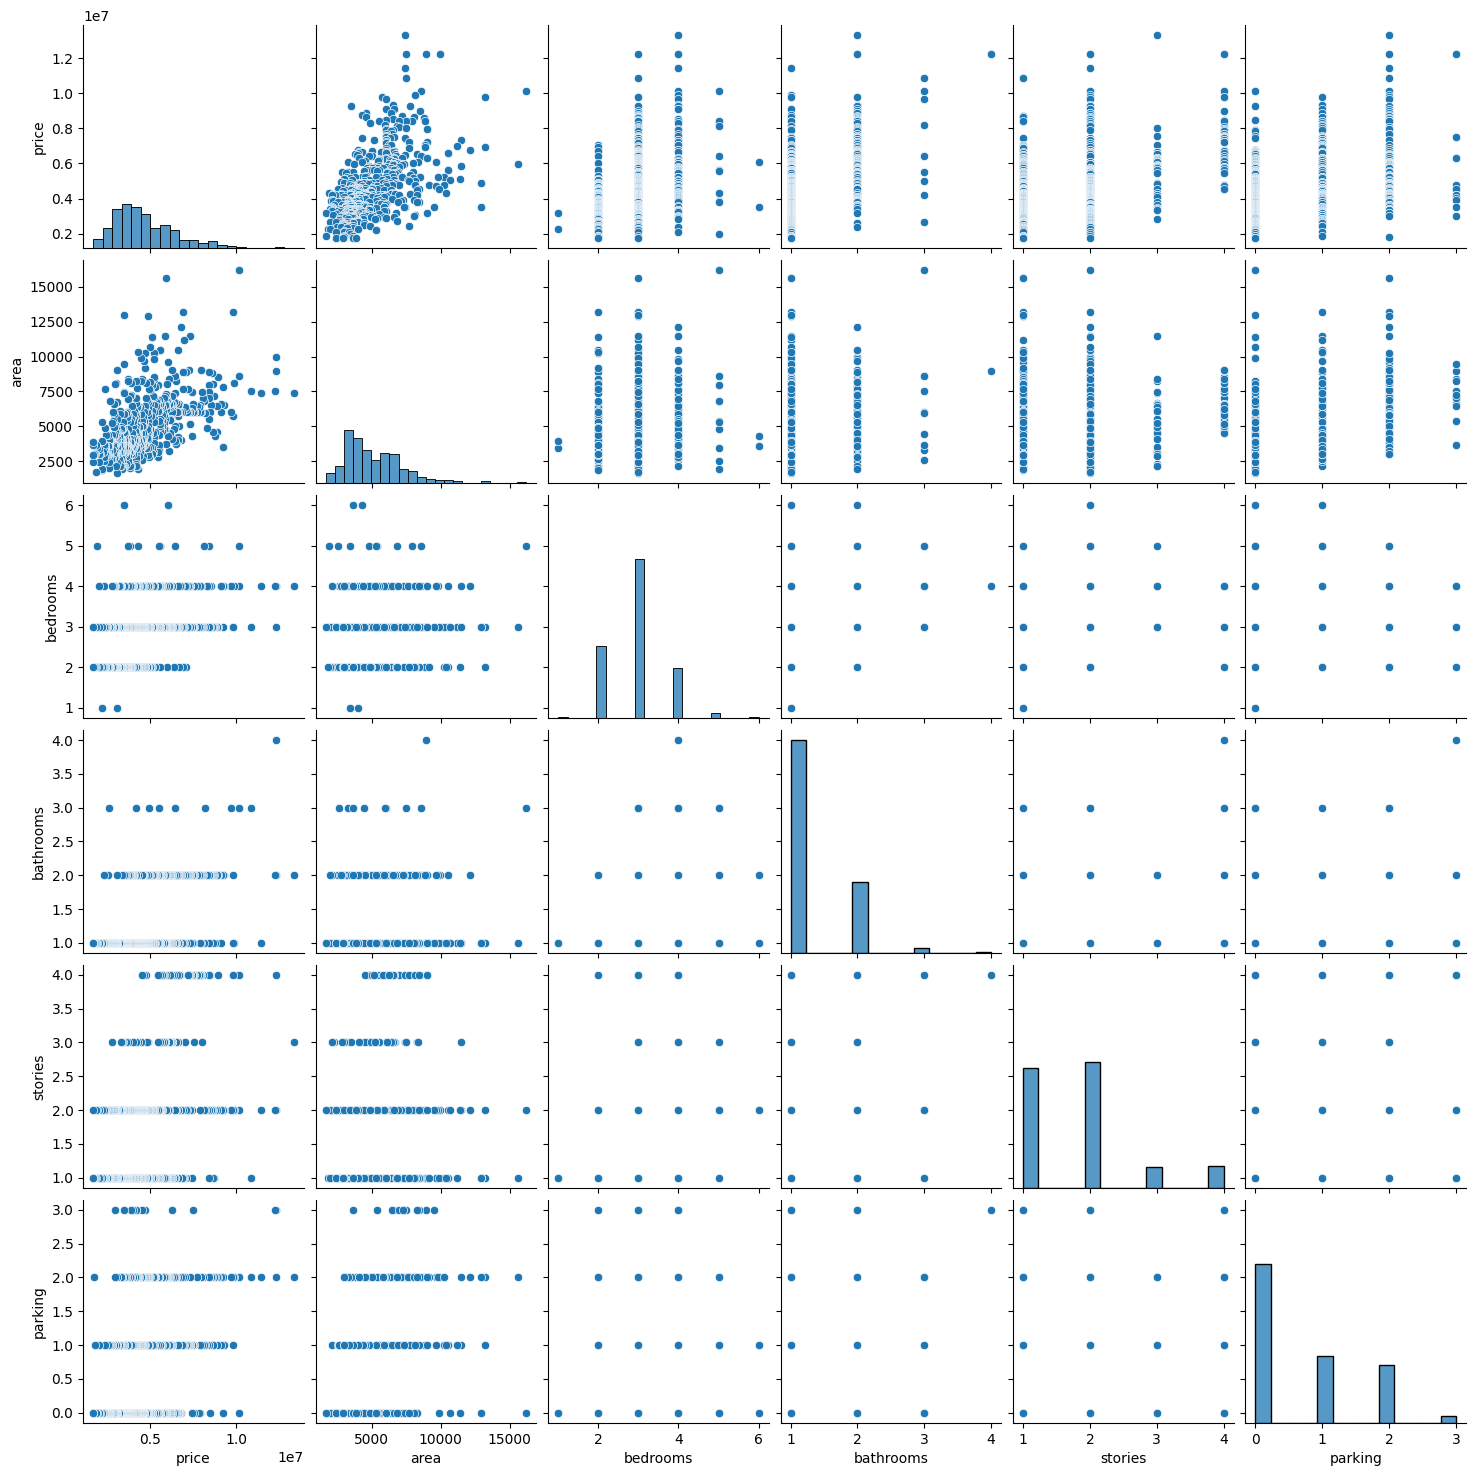

In [ ]:
sns.pairplot(df)

Se identifica una posible correlación directa entre la variable **precio** y la variable **area**

### Identificación elementos Outliers

Utilizando gráficos boxplot se identidficarán los elementos outlier presentes en cada variable

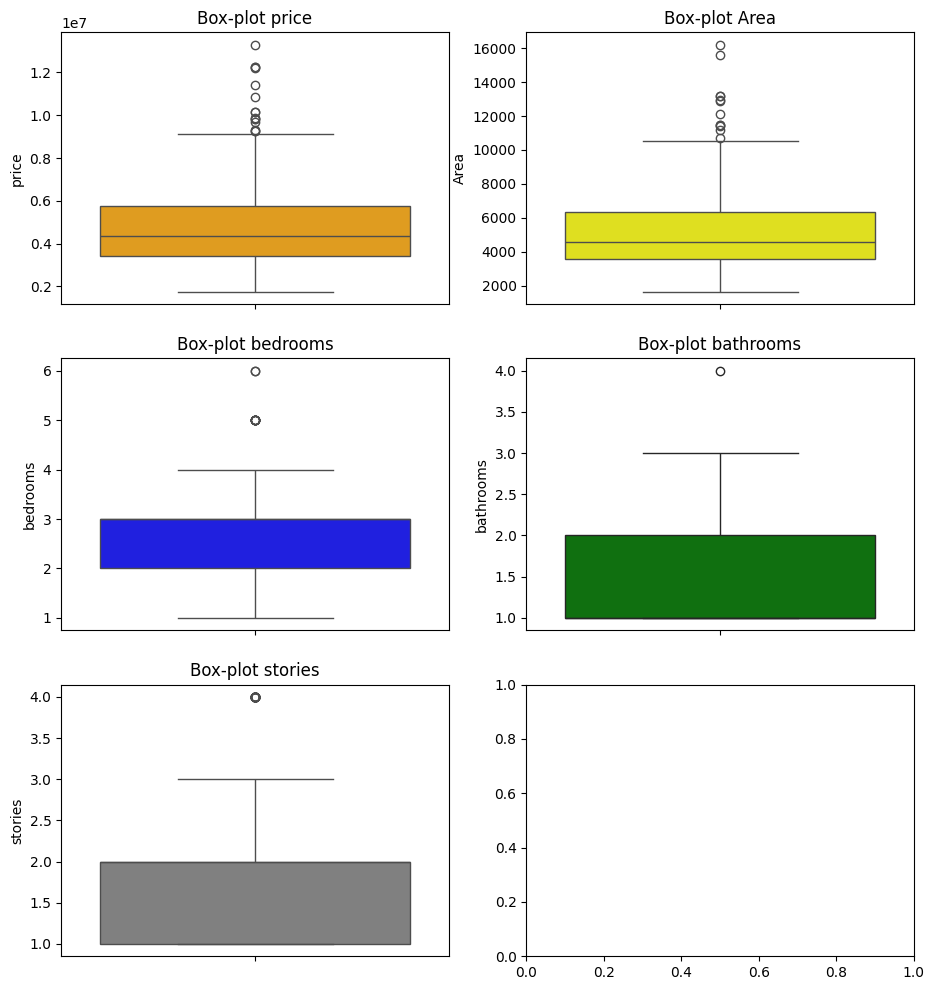

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(11, 12))
sns.boxplot(data=df, y='price', ax=axes[0,0],color='orange')
axes[0,0].set_title('Box-plot price')
axes[0,0].set_ylabel('price')
axes[0,0].grid(False)

sns.boxplot(data=df, y='area', ax=axes[0,1],color='yellow')
axes[0,1].set_title('Box-plot Area')
axes[0,1].set_ylabel('Area')
axes[0,1].grid(False)

sns.boxplot(data=df, y='bedrooms', ax=axes[1,0], color='blue')
axes[1,0].set_title('Box-plot bedrooms')
axes[1,0].set_ylabel('bedrooms')
axes[1,0].grid(False)

sns.boxplot(data=df, y='bathrooms', ax=axes[1,1], color='green')
axes[1,1].set_title('Box-plot bathrooms')
axes[1,1].set_ylabel('bathrooms')
axes[1,1].grid(False)

sns.boxplot(data=df, y='stories', ax=axes[2,0], color='gray')
axes[2,0].set_title('Box-plot stories')
axes[2,0].set_ylabel('stories')
axes[2,0].grid(False)

In [ ]:
df_desafio = df

Dado que la variable objetivo **price** presenta outliers, se procederá a eliminar estos elementos.

In [ ]:
df_desafio= df_sin_outliers(df,'price')

In [ ]:
df_desafio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530 entries, 15 to 544
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   price            530 non-null    int64 
 1   area             530 non-null    int64 
 2   bedrooms         530 non-null    int64 
 3   bathrooms        530 non-null    int64 
 4   stories          530 non-null    int64 
 5   guestroom        530 non-null    object
 6   hotwaterheating  530 non-null    object
 7   airconditioning  530 non-null    object
 8   parking          530 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 41.4+ KB


A continuación se evalua gráficamente, el dataset resultado después de haber eliminado los elementos outliers presentes en la variable objetivo para determinar acciones a seguir.

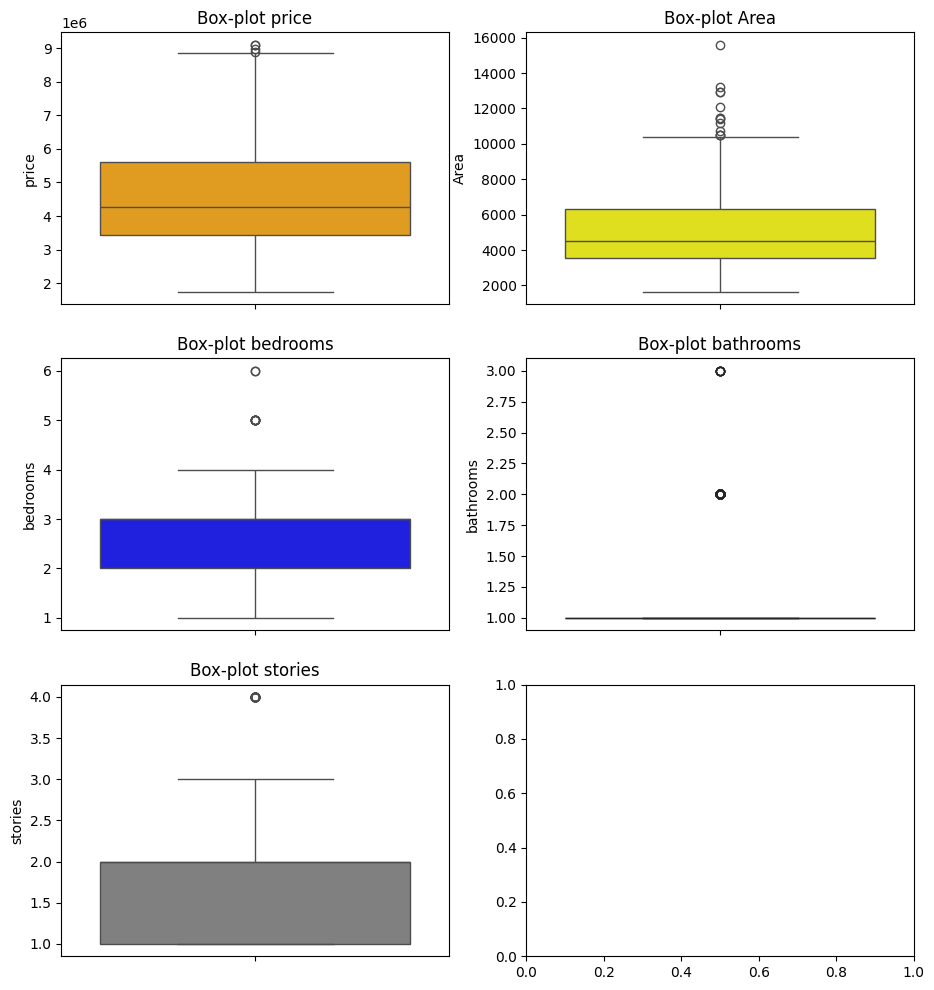

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(11, 12))
sns.boxplot(data=df_desafio, y='price', ax=axes[0,0],color='orange')
axes[0,0].set_title('Box-plot price')
axes[0,0].set_ylabel('price')
axes[0,0].grid(False)

sns.boxplot(data=df_desafio, y='area', ax=axes[0,1],color='yellow')
axes[0,1].set_title('Box-plot Area')
axes[0,1].set_ylabel('Area')
axes[0,1].grid(False)

sns.boxplot(data=df_desafio, y='bedrooms', ax=axes[1,0], color='blue')
axes[1,0].set_title('Box-plot bedrooms')
axes[1,0].set_ylabel('bedrooms')
axes[1,0].grid(False)

sns.boxplot(data=df_desafio, y='bathrooms', ax=axes[1,1], color='green')
axes[1,1].set_title('Box-plot bathrooms')
axes[1,1].set_ylabel('bathrooms')
axes[1,1].grid(False)

sns.boxplot(data=df_desafio, y='stories', ax=axes[2,0], color='gray')
axes[2,0].set_title('Box-plot stories')
axes[2,0].set_ylabel('stories')
axes[2,0].grid(False)


Habiendo analizado las obtenidas anteriormente, se decide volver a eliminar los elementos outlier presentes en la variable objetivo **price**.

In [ ]:
df_desafio = df_sin_outliers(df_desafio,'price')

In [ ]:
df_desafio.shape

(526, 9)

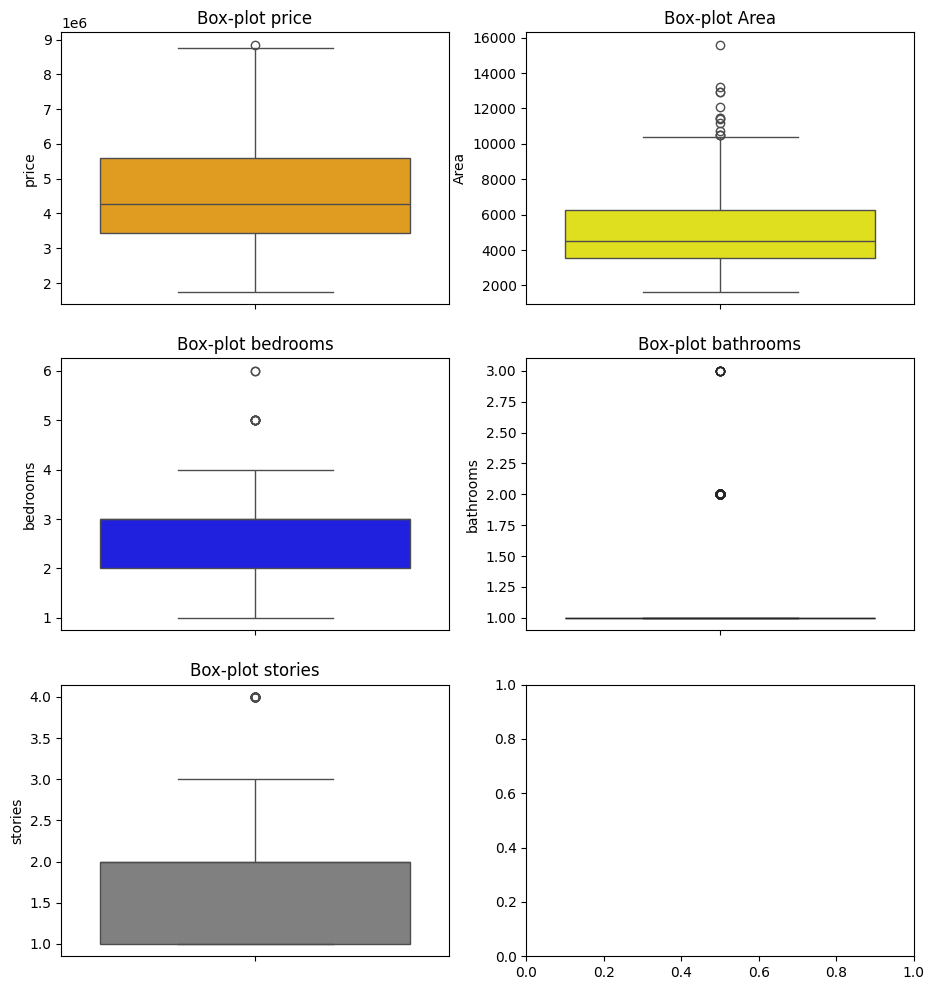

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(11, 12))
sns.boxplot(data=df_desafio, y='price', ax=axes[0,0],color='orange')
axes[0,0].set_title('Box-plot price')
axes[0,0].set_ylabel('price')
axes[0,0].grid(False)

sns.boxplot(data=df_desafio, y='area', ax=axes[0,1],color='yellow')
axes[0,1].set_title('Box-plot Area')
axes[0,1].set_ylabel('Area')
axes[0,1].grid(False)

sns.boxplot(data=df_desafio, y='bedrooms', ax=axes[1,0], color='blue')
axes[1,0].set_title('Box-plot bedrooms')
axes[1,0].set_ylabel('bedrooms')
axes[1,0].grid(False)

sns.boxplot(data=df_desafio, y='bathrooms', ax=axes[1,1], color='green')
axes[1,1].set_title('Box-plot bathrooms')
axes[1,1].set_ylabel('bathrooms')
axes[1,1].grid(False)

sns.boxplot(data=df_desafio, y='stories', ax=axes[2,0], color='gray')
axes[2,0].set_title('Box-plot stories')
axes[2,0].set_ylabel('stories')
axes[2,0].grid(False)


In [ ]:
df_desafio.reset_index(drop=True, inplace=True)

In [ ]:
df_desafio

,price,area,bedrooms,bathrooms,stories,guestroom,hotwaterheating,airconditioning,parking
0,8855000,6420,3,2,2,no,no,yes,1
1,8750000,4320,3,1,2,no,yes,no,2
2,8680000,7155,3,2,1,yes,no,yes,2
3,8645000,8050,3,1,1,yes,no,yes,1
4,8645000,4560,3,2,2,yes,no,yes,1
...,...,...,...,...,...,...,...,...,...
521,1820000,3000,2,1,1,no,no,no,2
522,1767150,2400,3,1,1,no,no,no,0
523,1750000,3620,2,1,1,no,no,no,0
524,1750000,2910,3,1,1,no,no,no,0


A continuación se procede a reemplazar datos alfanuméricos (yes/no) por datos numméricos (1/0)

In [ ]:
df_desafio = pd.get_dummies(df_desafio, columns=['guestroom'], drop_first=False, prefix='guestroom',dtype= int)

In [ ]:
df_desafio = pd.get_dummies(df_desafio, columns=['hotwaterheating'], drop_first=False, prefix='hotwaterheating',dtype= int)

In [ ]:
df_desafio = pd.get_dummies(df_desafio, columns=['airconditioning'], drop_first=False, prefix='airconditioning',dtype= int)

In [ ]:
df_desafio

,price,area,bedrooms,bathrooms,stories,parking,guestroom_no,guestroom_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes
19,8855000,6420,3,2,2,1,1,0,1,0,0,1
20,8750000,4320,3,1,2,2,1,0,0,1,1,0
21,8680000,7155,3,2,1,2,0,1,1,0,0,1
22,8645000,8050,3,1,1,1,0,1,1,0,0,1
23,8645000,4560,3,2,2,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,1,0
541,1767150,2400,3,1,1,0,1,0,1,0,1,0
542,1750000,3620,2,1,1,0,1,0,1,0,1,0
543,1750000,2910,3,1,1,0,1,0,1,0,1,0


A continuación se presenta la matriz de correlación

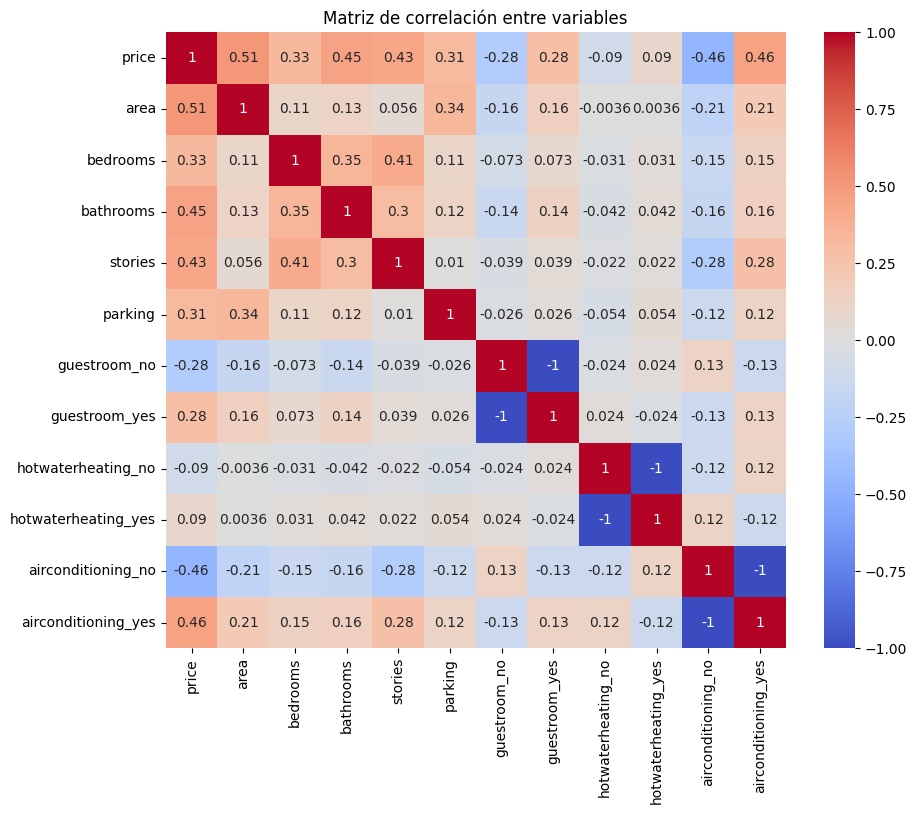

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_desafio.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación entre variables')
plt.show()

Mediante el heatmap se verifica la correlación directa entre las variables **precio** y **area**, siendo esta la más preponderanteen comparación con las relaciones entre la variable objetivo **precio** con las variables **bathrooms**, **bedrooms**, **stories** y **parking**

### a) Importa el estimador de regresión lineal de Scikit-learn.

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

### b) Divide los datos (80% train y 20% test)

Separación del dataset en datos de entrenamiento y datos de validación

In [ ]:
df_desafio_x = df_desafio.drop('price',axis=1)
df_desafio_y = df_desafio['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_desafio_x, df_desafio_y, test_size=0.2, random_state=42)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420 entries, 88 to 121
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   area                 420 non-null    int64
 1   bedrooms             420 non-null    int64
 2   bathrooms            420 non-null    int64
 3   stories              420 non-null    int64
 4   parking              420 non-null    int64
 5   guestroom_no         420 non-null    int64
 6   guestroom_yes        420 non-null    int64
 7   hotwaterheating_no   420 non-null    int64
 8   hotwaterheating_yes  420 non-null    int64
 9   airconditioning_no   420 non-null    int64
 10  airconditioning_yes  420 non-null    int64
dtypes: int64(11)
memory usage: 39.4 KB


In [ ]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 106 entries, 330 to 239
Series name: price
Non-Null Count  Dtype
--------------  -----
106 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


In [ ]:
X_train.shape, y_train.shape, X_test.shape,  y_test.shape

((420, 11), (420,), (106, 11), (106,))

In [ ]:
df_desafio.shape

(526, 12)

In [ ]:
round(420/526,1)

0.8

### C) Crea una instancia del modelo de regresión lineal.

In [ ]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

### d) Ajusta el modelo utilizando los datos de entrenamiento.

In [ ]:
Y_pred = lin_reg.predict(X_test)
print('Coeficientes:\n', lin_reg.coef_)


Coeficientes:
 [ 2.60683521e+02  2.43347931e+04  8.27325941e+05  4.75747404e+05
  1.82712019e+05 -3.08873006e+05  3.08873006e+05 -3.18871796e+05
  3.18871796e+05 -3.99074925e+05  3.99074925e+05]
MSE: 1200091633079.8345
MAE: 833577.9819557092
R2: 0.6419425261581236


In [ ]:
lin_reg.intercept_

np.float64(1656215.2958423616)

### e) Evaluación del modelo

a. Utiliza los datos de entrenamiento y calcula métricas de evaluación, como elerror cuadrado medio (MSE) o el coeficiente de determinación (R^2). Grafica los coeficientes.

In [ ]:
print('MSE:', mean_squared_error(y_test, Y_pred))
print('MAE:', mean_absolute_error(y_test, Y_pred))
print('R2:', lin_reg.score(X_test, y_test))

MSE: 1200091633079.8345
MAE: 833577.9819557092
R2: 0.6419425261581236


In [ ]:
coeficientes = pd.DataFrame(lin_reg.coef_, X_train.columns, columns=['Coeficientes'])

In [ ]:
coeficientes

,Coeficientes
area,260.683521
bedrooms,24334.793127
bathrooms,827325.940976
stories,475747.403680
parking,182712.019221
guestroom_no,-308873.005957
guestroom_yes,308873.005957
hotwaterheating_no,-318871.795809
hotwaterheating_yes,318871.795809
airconditioning_no,-399074.924542


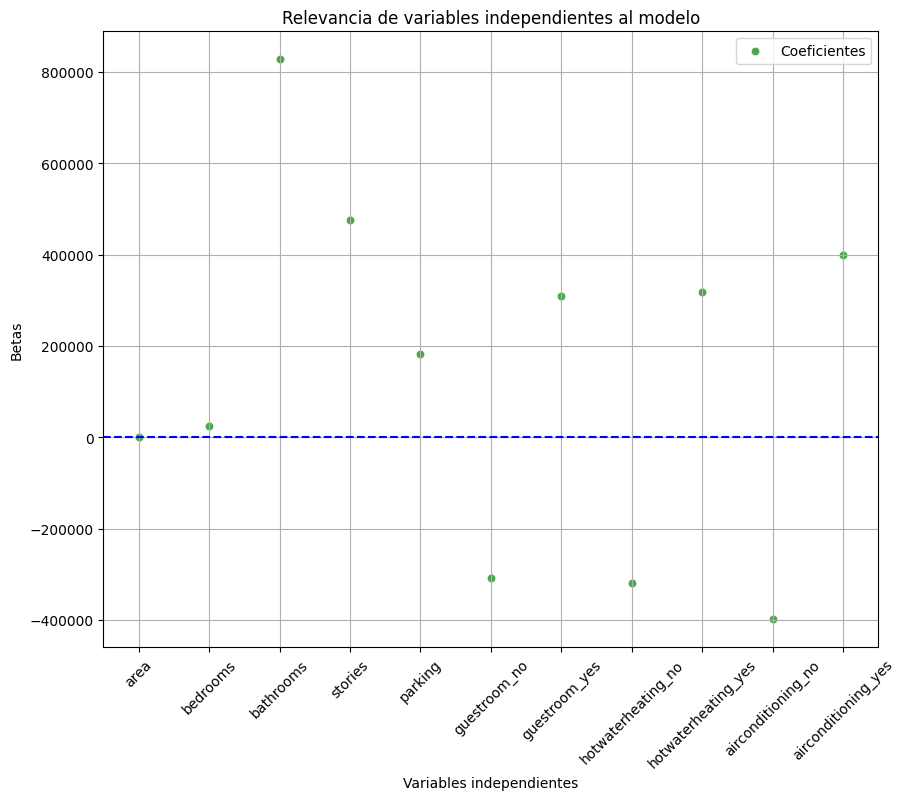

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.scatterplot(x=coeficientes.index, y='Coeficientes', data=coeficientes, color='green', alpha=0.7)
plt.axhline(y=0, color='blue', linestyle='--')
#ax.set_yscale('log')
plt.xticks(rotation=45)
plt.title('Relevancia de variables independientes al modelo')
plt.xlabel('Variables independientes')
plt.ylabel('Betas')
plt.legend(['Coeficientes'])
plt.grid(True)
plt.show()

### f) Utiliza los datos de prueba para realizar predicciones con el modelo entrenado, y evalúa el rendimiento del modelo comparando las predicciones con los valores reales.

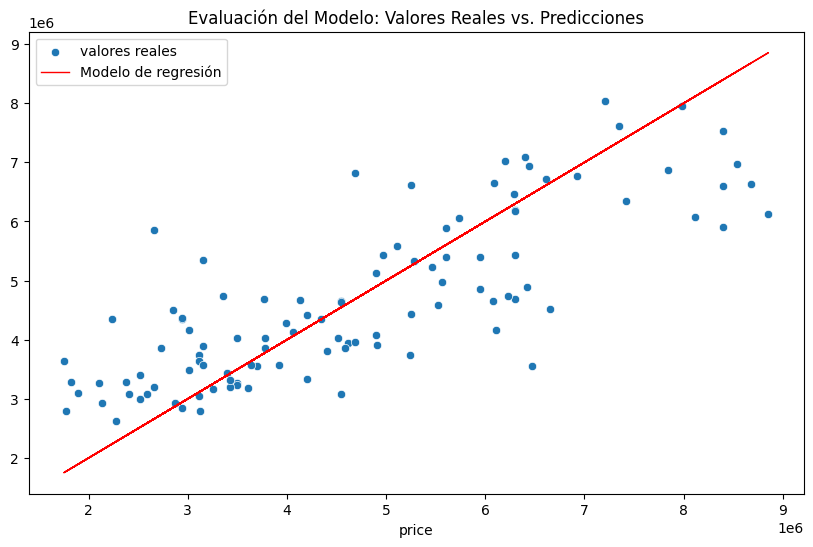

In [ ]:
# Graficar Valores Reales vs Predicciones
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=Y_pred)
plt.plot(y_test, y_test, color='red', linewidth=1)
plt.title('Evaluación del Modelo: Valores Reales vs. Predicciones')
plt.legend(['valores reales', 'Modelo de regresión'])
plt.show()

### **Conclusión:** El modelo evalua correctamente el 64% de las predicciones realizadas. Para efectos prácticos es recomendable realizar ajustes en el modelo que permitan predecir correctamente una cantidad mayor de casos evaluados.